# Can proprioceptive training improve motor learning? - Wong et al. 2012

In [1]:
# libraries 
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
from matplotlib.patches import Rectangle as rect
import os 
os.chdir('/Users/duncan/Documents/GitHub/Recreate-Papers/Wong12_PropTrain')

In [2]:
# personal functions 
def writeGif(filenameG, filenames, supplemental=False):
    
    '''
    Save figure files as gif file and delete figures used to create gif 

    INPUTS:
    filenameG: filename for .gif file 
    filenames: filenames of individual figures to be saved together as gif
    supplemental: put in supplemental or not, boolean

    OUTPUTS:
    .gif file of files in filenmae 
    '''
    import imageio 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    with imageio.get_writer(filenameG+'.gif', mode='I',fps=10) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image) # add to gif 
            os.remove(filename) # delete individual 
    
    # Get back to original folder 
    os.chdir(cwd)

def best_save(fig_obj, fig_name, close=True, supplemental=False):
    
    '''
    Save figures easily, compact, and to various places as .png (no friendly with other formats)

    INPUTS:
    fig_obj: figure object, object 
    fig_name: figure name, string 
    close: close figure, boolean 
    supplemental: put in supplemental folder, boolean 

    OUTPUT:
    Save figure in figures folder > date > main or supplemental
    '''

    # import needed library 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    # Save 
    if '.png' in fig_name:
        fig_obj.savefig(fig_name, bbox_inches='tight', dpi=300)
    else:
        fig_obj.savefig(fig_name+'.png', bbox_inches='tight', dpi=300)

    if close: # close 
        matplotlib.pyplot.close(fig_obj)

    # Get back to original folder 
    os.chdir(cwd)

## Figure 1B

In [3]:
t = np.linspace(0, 3, 3000)
x = np.concatenate((np.zeros(shape=(500,)), 10 * np.sin(np.linspace(2*np.pi, 0, 2000)), np.zeros(shape=(500,))))/100
y = np.concatenate((np.zeros(shape=(500,))+0.1, (0.1 - -0.1)/2 * np.cos(np.linspace(0, 2*np.pi, 2000)) + (0.1 + -0.1)/2, np.zeros(shape=(500,))+0.1))

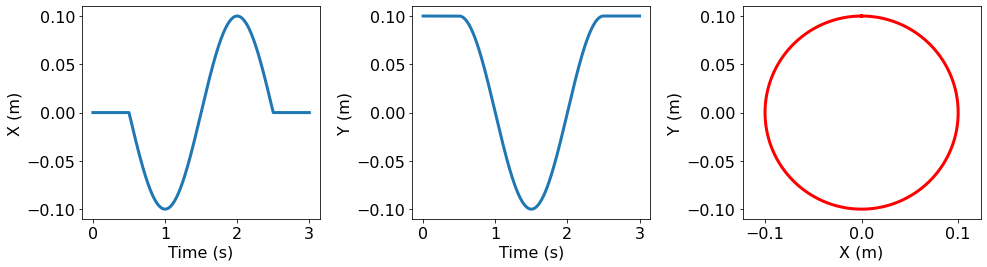

In [4]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(t, x, lw=3)
plt.xlabel('Time (s)')
plt.ylabel('X (m)')

plt.subplot(1,3,2)
plt.plot(t, y, lw=3)
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')

plt.subplot(1,3,3)
plt.plot(x, y, lw=3, c='r')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
ax = plt.gca()
ax.axis('equal')


plt.tight_layout()
plt.show()

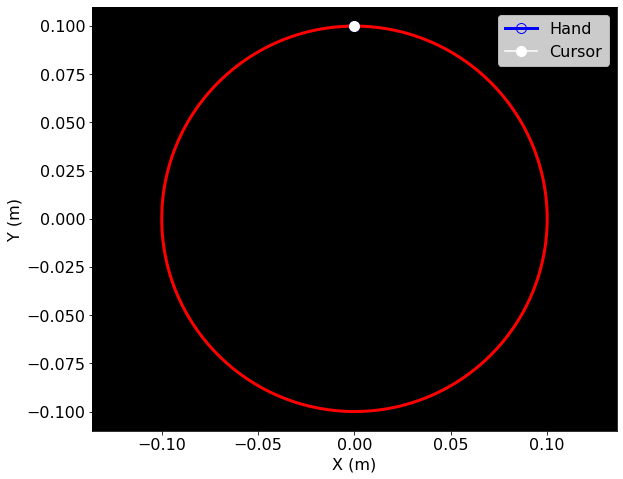

In [7]:
plt.figure(figsize=(9.4, 7.8))
plt.plot(x, y, lw=3, c='r')
plt.plot(x[0],y[0], marker='o', c='b', markersize=10, fillstyle='none', lw=3, label='Hand')
plt.plot(x[0],y[0], marker='o', c='w', markersize=10, label='Cursor')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
ax = plt.gca()
ax.axis('equal')
ax.add_patch(rect((-0.2,-0.13), 1,1, color='k'))
plt.legend(loc=0)
plt.show()

In [6]:
# make gif of CTRL visual demonstration trials 
fnames = []

for i in np.arange(0, 3000, 25):

    fig = plt.figure(figsize=(9.4, 7.8))
    plt.plot(x, y, lw=3, c='r')
    plt.plot(x[0],y[0], marker='o', markersize=10, c='tab:purple', label='Hand')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='w', label='Cursor')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    ax = plt.gca()
    ax.axis('equal')
    ax.add_patch(rect((-0.2,-0.13), 1,1, color='k'))
    plt.legend(loc=0)
    plt.title('CTRL')

    filename = f'{i}CTRLDemo.png'
    fnames.append(filename)
    best_save(fig, filename)
    
writeGif('CTRLDemo', fnames)

In [7]:
# make gif of PASS visual demonstration trials 
fnames = []

for i in np.arange(0, 3000, 25):

    fig = plt.figure(figsize=(9.4, 7.8))
    plt.plot(x, y, lw=3, c='r')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='tab:purple', label='Hand')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='w', label='Cursor')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    ax = plt.gca()
    ax.axis('equal')
    ax.add_patch(rect((-0.2,-0.13), 1,1, color='k'))
    plt.legend(loc=0)
    plt.title('PASS')

    filename = f'{i}PASSDemo.png'
    fnames.append(filename)
    best_save(fig, filename)
    
writeGif('PASSDemo', fnames)

In [8]:
# make gif of REV visual demonstration trials 
fnames = []
xflip = np.flip(x)
yflip = np.flip(y)

for i in np.arange(0, 3000, 25):

    fig = plt.figure(figsize=(9.4, 7.8))
    plt.plot(x, y, lw=3, c='r')
    plt.plot(xflip[i],yflip[i], marker='o', markersize=10, c='tab:purple', label='Hand')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='w', label='Cursor')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    ax = plt.gca()
    ax.axis('equal')
    ax.add_patch(rect((-0.2,-0.13), 1,1, color='k'))
    plt.legend(loc=0)
    plt.title('REV')

    filename = f'{i}REVDemo.png'
    fnames.append(filename)
    best_save(fig, filename)
    
writeGif('REVDemo', fnames)

In [9]:
# make gif of ACT visual demonstration trials 
fnames = []

for i in np.arange(0, 3000, 25):

    fig = plt.figure(figsize=(9.4, 7.8))
    plt.plot(x, y, lw=3, c='r')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='tab:purple', label='Hand')
    plt.plot(x[i],y[i], marker='o', markersize=10, c='w', label='Cursor')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    ax = plt.gca()
    ax.axis('equal')
    ax.add_patch(rect((-0.2,-0.13), 1,1, color='k'))
    plt.legend(loc=0)
    plt.title('ACT')

    filename = f'{i}ACTDemo.png'
    fnames.append(filename)
    best_save(fig, filename)
    
writeGif('ACTDemo', fnames)

In [10]:
# make a gif of attempt to replicate 
# have noise follow a random walk 

fnames = []
sigma = 0.001
noise = np.array([np.random.normal(0,sigma,(1,)), np.random.normal(0,sigma,(1,))]) # initialize 

for i in np.arange(0, 3000, 25):

    fig = plt.figure(figsize=(9.4, 7.8))
    plt.plot(x, y, lw=3, c='r', alpha=0.2)
    if i >= 500 and i <= 2500: 
        # update 
        noise = np.array([np.random.normal(noise[0],sigma,(1,)), np.random.normal(noise[1],sigma,(1,))]) # initialize 
        plt.plot(x[i]+noise[0],y[i]+noise[1], marker='o', markersize=10, c='tab:purple', label='Hand')
        plt.plot(x[i]+noise[0],y[i]+noise[1], marker='o', c='w', label='Cursor') 
    else : 
        plt.plot(x[i],y[i], marker='o', markersize=10, c='tab:purple', label='Hand')
        plt.plot(x[i],y[i], marker='o', c='w', label='Cursor') 
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    ax = plt.gca()
    ax.axis('equal')
    plt.xlim([-0.19, 0.19])
    plt.ylim([-0.12, 0.12])
    ax.add_patch(rect((-0.25,-0.18), 1,1, color='k'))
    plt.legend(loc=0)
    plt.title('Replicate')

    filename = f'{i}rep.png'
    fnames.append(filename)
    best_save(fig, filename)
    
writeGif('repDemo', fnames)